## 토픽 나눠서 분석

In [ ]:
import pandas as pd
import numpy as np

a = pd.read_csv('test_set_final.csv')

a.reset_index(inplace=True)

a = a.rename(columns={'index':'number'})

a = a.drop(['Unnamed: 0','number'],axis =1)


import datetime
a.stay_date = a.stay_date.apply(lambda x : 
                                  datetime.datetime.strptime(x, '%Y-%m-%d') )

a

from konlpy.tag import Okt
t = Okt()

a['tokens'] = a['review'].apply(lambda X : t.nouns(X))

topic1 = []

for i in range(len(a['tokens'])):
    for j in range(len(a['tokens'][i])):
        if a['tokens'][i][j] in ['뷰', '오션','바다','전망','야경', '아침']:
            # summ = summ + 1
            topic1.append(i)
            
topic1_index = pd.Series(topic1).unique()

topic5_1 = []

for i in range(len(a['tokens'])):
    for j in range(len(a['tokens'][i])):
        if a['tokens'][i][j] in ['청소','냄새', '화장실','먼지']:
            # summ = summ + 1
            topic5_1.append(i)
            
topic5_1_index = pd.Series(topic5_1).unique()

topic5_2 = []

for i in range(len(a['tokens'])):
    for j in range(len(a['tokens'][i])):
        if a['tokens'][i][j] in ['소리','방음','소음']:
            # summ = summ + 1
            topic5_2.append(i)
            
topic5_2_index= pd.Series(topic5_2).unique()

topic8_1 = []

for i in range(len(a['tokens'])):
    for j in range(len(a['tokens'][i])):
        if a['tokens'][i][j] in ['주차','주차장']:
            # summ = summ + 1
            topic8_1.append(i)
            
topic8_1_index = pd.Series(topic8_1).unique()

topic8_2 = []

for i in range(len(a['tokens'])):
    for j in range(len(a['tokens'][i])):
        if a['tokens'][i][j] in ['가격','가성', '무료']:
            # summ = summ + 1
            topic8_2.append(i)
            
topic8_2_index= pd.Series(topic8_2).unique()

topic1=a.iloc[topic1_index.astype('float').tolist(),]
topic1.to_csv('./topic1.csv', encoding='utf-8-sig')

topic8_1=a.iloc[topic8_1_index.astype('float').tolist(),]
topic8_1.to_csv('./topic8_1.csv', encoding='utf-8-sig')

topic8_2=a.iloc[topic8_2_index.astype('float').tolist(),]
topic8_2.to_csv('./topic8_2.csv', encoding='utf-8-sig')

topic5_1=a.iloc[topic5_1_index.astype('float').tolist(),]
topic5_1.to_csv('./topic5_1.csv', encoding='utf-8-sig')

topic5_2=a.iloc[topic5_2_index.astype('float').tolist(),]
topic5_2.to_csv('./topic5_2.csv', encoding='utf-8-sig')

## 전체 워드클라우드

In [ ]:
import pandas as pd
import numpy as np

a = pd.read_csv('test_set_final.csv')
b = pd.read_csv('hotel_review_label1.csv')
data_origin = pd.concat([a,b])
data_origin.to_csv('train_and_test.csv',encoding='UTF-8-sig')
# 데이터 프레임 만들기 
df = pd.read_csv('train_and_test.csv')

df.reset_index(inplace=True)
df = df.rename(columns={'index':'number'})
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis =1)


#df.score.value_counts().plot(kind='bar',figsize =(8,4))
#df.stay_date.value_counts().plot(kind='bar',figsize =(8,4))

# 날짜로 변환
import datetime

df.stay_date = df.stay_date.apply(lambda x : 
                                  datetime.datetime.strptime(x, '%Y-%m-%d') )

df.to_csv('review_all.txt',index=True, sep='\t')

import nltk
from konlpy.tag import Okt
from konlpy import jvm
from konlpy.corpus import kolaw

from collections import Counter

twitter=Okt()

file_all = open("review_all.txt", 'r',encoding = "utf-8")
data_all = file_all.readlines()
file_all.close()

word_all = ''
for line in data_all: 
    word_all = word_all + line + '\t'
#     print(twitter.nouns(line))
#print(word)

tokens_ko_all = twitter.nouns(word_all)

ko_all = nltk.Text(tokens_ko_all)
print(len(ko_all.tokens))      # 토큰 전체 갯수 
print(len(set(ko_all.tokens))) # 토큰 unique 갯수

ko_all.vocab().most_common(200)

stop_words_all =['것','호텔','이용','방문','다음','것','또','때','수', '신라','정말','스테이',
            '곳','롯데','투숙','생각','층','더','최고','추천','기분','매우','시간','바로',
            '다시','아주', '숙박','서울','호캉스','모두','앞', '점', '조금','처음','좀',
            '해운대', '쉬','근처','부산','분','숙소', '비','등','상태', '박','재','느낌',
            '정도','덕분','마음','다른','번','선택', '이번','꼭','때문','역시','무엇','저','제',
            '하나','다만','울산', '하루', '사람','시티','모든','항상', '이','말','그','또한','만족',
            '자주','의사', '안','월드','날','한번','거리','및','여기', '중', '도', '감동','전체', '제주',
             '전반', '류', '만','방도','방이','가장', '제공', '예정', '내','거', '건물', '부분', '시','옆',
             '진짜','전', '내부', '후','요', '일단', '이동','준비','완전','기회','급','짐', '도착', '위해','기대',
             '글래드','라마','제주도', '여름', '고객', '주말', '듯','인상','해','일','이상','동안','보고','해주시',
             '그냥','걱정','쪽','집', '디럭스','배정','하얏트','공간', '제일','객','별로','가지','고민','사진','메리어트',
             '편', '편이', '관리','강추','함', '파크','아베','종류','신경','끼리','계속','가기','못','푹','광화문','대해',
             '위','나','우선','마포','리뷰','걸','모습','굿','첫','연결','우리','일찍','습','계획','임','일정','문제','힐튼',
             '신화','강','남산','여의도','명','제대로','타워','어디','맞이','저희','맛','부대','모던','건']
# 생일 호텔 놀러가자~
# 호텔에서 술 많이 마시려나? 맥주
# 혼자
# 배려 
# 냄새
# 패키지
tokens_ko_all = [each_word for each_word in tokens_ko_all
            if each_word not in stop_words_all]

ko_all = nltk.Text(tokens_ko_all)
ko_all.vocab().most_common(100)

300098
13249


[('직원', 6115),
 ('객실', 3432),
 ('시설', 2511),
 ('체크', 2407),
 ('위치', 2399),
 ('룸', 2380),
 ('뷰', 2322),
 ('서비스', 2317),
 ('조식', 2169),
 ('여행', 1740),
 ('가족', 1455),
 ('방', 1408),
 ('가격', 1395),
 ('아이', 1334),
 ('수영장', 1285),
 ('예약', 1256),
 ('컨디션', 1239),
 ('침구', 1122),
 ('침대', 1116),
 ('주변', 1039),
 ('친구', 989),
 ('응대', 809),
 ('프론트', 788),
 ('음식', 770),
 ('안내', 752),
 ('라운지', 713),
 ('로비', 702),
 ('가성', 651),
 ('코로나', 631),
 ('주차', 629),
 ('분위기', 615),
 ('체크아웃', 568),
 ('업그레이드', 565),
 ('화장실', 541),
 ('어메니티', 540),
 ('요청', 502),
 ('전망', 490),
 ('접근성', 489),
 ('공항', 455),
 ('대비', 453),
 ('출장', 453),
 ('바다', 453),
 ('청소', 446),
 ('아침', 440),
 ('저녁', 433),
 ('사용', 431),
 ('맘', 424),
 ('욕조', 423),
 ('친절', 413),
 ('주차장', 408),
 ('식당', 407),
 ('교통', 405),
 ('오션', 401),
 ('기억', 398),
 ('맛집', 396),
 ('편의점', 395),
 ('식사', 392),
 ('욕실', 373),
 ('청결', 358),
 ('설명', 357),
 ('감사', 355),
 ('차', 355),
 ('시내', 347),
 ('밤', 346),
 ('추억', 340),
 ('인테리어', 335),
 ('편의', 334),
 ('야경', 328),
 ('뷔페', 320),


In [ ]:
# ko_all.concordance('지하')
#ko_all.similar('지하')
#ko_all.common_contexts(['지하','음식'])

# 단어의 사용 빈도 확인
fd = ko_all.vocab()
type(fd)

# 단어의 사용 빈도 확인
from nltk import FreqDist

fd_names = FreqDist(fd)


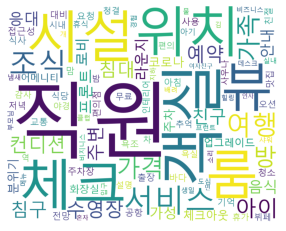

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import matplotlib
from matplotlib import font_manager, rc
import platform

#if platform.system() == 'Windows':
# 윈도우인 경우
#   font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#   rc('font', family=font_name)
    
wc = WordCloud(font_path ="c:/Windows/Fonts/malgun.ttf" ,
               width=1000, height=800, 
               max_words = 100,
               max_font_size=300,
               background_color='white', random_state=0)

plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()